1.Install Dependencies

In [5]:
%load_ext autoreload
# Used to import data from S3.
import pandas as pd

# Used to create the dense document vectors.
import torch
from sentence_transformers import SentenceTransformer

# Used to create and store the Faiss index.
import numpy as np
import pickle
from pathlib import Path


In [6]:
pip install faiss-cpu

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install versions s3fs==0.5.1 --user

Note: you may need to restart the kernel to use updated packages.


In [8]:
from sentence_transformers import SentenceTransformer, InputExample
from torch.utils.data import DataLoader

In [9]:
#Import Dataset
data=pd.read_csv('wiki_movie_plots.csv')

In [10]:
data.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [11]:
#Initiate sentence level
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/555 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/505 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# Step 1: Change data type
embeddings = np.array([embedding for embedding in embeddings]).astype("float32")

# Step 2: Instantiate the index
index = faiss.IndexFlatL2(embeddings.shape[1])

# Step 3: Pass the index to IndexIDMap
index = faiss.IndexIDMap(index)

# Step 4: Add vectors and their IDs
index.add_with_ids(embeddings, df.id.values)

# Retrieve the 10 nearest neighbours
D, I = index.search(np.array([embeddings[5415]]), k=10)

2. Data Analysis

In [74]:
data.isnull().sum()

Release Year           0
Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:>

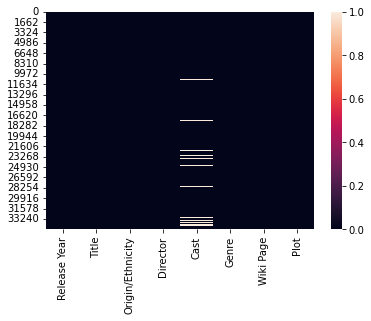

In [75]:
#Visualise missing values
sns.heatmap(data.isnull())